In [3]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.models import load_model
from process_seg import coff ,ImageProcessor
#############################classes###########################
losses = coff(smooth=1.0)
proc=ImageProcessor()


In [4]:
model = load_model('seg_class.h5', custom_objects={'bce_dice_loss': losses.bce_dice_loss, 'iou': losses.iou, 'dice_coef': losses.dice_coef})


In [21]:
# Load the original image
image = cv2.imread(r'Tr-me_0114.jpg')

# Print the shape of the original image
print('Original image shape:', image.shape)

# Preprocess the image
image_path = 'Tr-me_0115.jpg'
image_ex = proc.preprocess_image(image_path)

# Print the shape of the preprocessed image
print('Preprocessed image shape:', image_ex.shape)

# Assume `model` is a Keras model that predicts a segmentation mask
pred = model.predict(image_ex)

# Print the shape of the predicted segmentation mask
print('Segmentation mask shape:', pred.shape)

# Merge the segmentation mask with the original image
merged = proc.merging(image, pred[0])



Original image shape: (512, 512, 3)
Preprocessed image shape: (1, 256, 256, 3)
1/1 [==============================] - 0s 284ms/step
Segmentation mask shape: (1, 256, 256, 1)


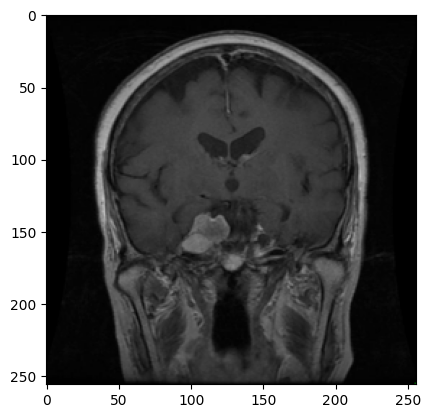

In [22]:
# Display the merged image
plt.imshow(merged)
plt.show()